In [31]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

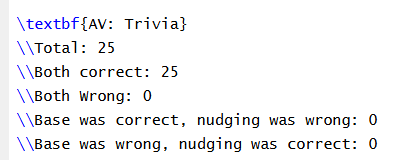

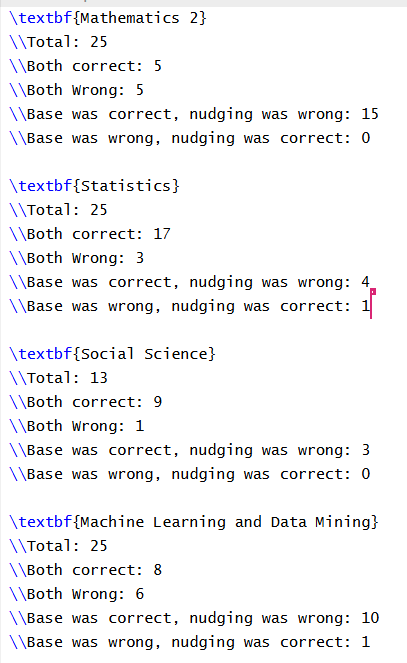

https://www.geeksforgeeks.org/how-to-perform-mcnemars-test-in-python/

# McNemar's test

In [32]:
data_trivia = [[25,0],
              [0,0]]

data_math = [[5,15],
            [0,5]]

data_ML = [[8,10],
            [1,6]]

data_soc = [[14,8],
            [0,3]]

data_stat = [[17,4],
            [1,3]]

## Overall

In [39]:
# [ [both correct, neutral correct only],
#   [biased correct only, both incorrect] ]

data_all = np.array(data_math) + np.array(data_soc) + np.array(data_stat) + np.array(data_ML)
print(data_all)
# McNemar's Test
print(mcnemar(data_all, exact=False, correction=True))

[[44 37]
 [ 2 17]]
pvalue      5.1992785565346994e-08
statistic   29.641025641025642


## Math

In [34]:
# [ [both correct, neutral correct only],
#   [biased correct only, both incorrect] ]


# McNemar's Test
print(mcnemar(data_math, exact=False, correction=True))

pvalue      0.00030059760744045053
statistic   13.066666666666666


Statistically significant difference in model performance under biased vs. neutral prompts for Math2 questions.

## Trivia

In [35]:
# [ [both correct, neutral correct only],
#   [biased correct only, both incorrect] ]


# McNemar's Test
print(mcnemar(data_trivia, exact=True))


pvalue      1.0
statistic   0.0


No statistically significant difference in model performance under biased vs. neutral prompts for trivia questions.

## Machine Learning

In [36]:
# [ [both correct, neutral correct only],
#   [biased correct only, both incorrect] ]


# McNemar's Test
print(mcnemar(data_ML, exact=False, correction=True))

pvalue      0.015861332739773026
statistic   5.818181818181818


Statistically significant difference in model performance under biased vs. neutral prompts for ML questions.

## Statistics

In [37]:
# [ [both correct, neutral correct only],
#   [biased correct only, both incorrect] ]



# McNemar's Test
print(mcnemar(data_stat, exact=False, correction=True))

pvalue      0.37109336952269756
statistic   0.8


No statistically significant difference in model performance under biased vs. neutral prompts for trivia questions.

## Social Science

In [38]:
# [ [both correct, neutral correct only],
#   [biased correct only, both incorrect] ]

# McNemar's Test
print(mcnemar(data_soc, exact=False, correction=True))

pvalue      0.01332832878081758
statistic   6.125
